# Task: Perform in code (check lab notebook) or by hand  

<img src="attachment:image.png" alt="Drawing" style="width: =600px;"/>

# Hierarchical clustering via pipelines

<img src="attachment:image.png" alt="Drawing" style="width: =600px;"/>

# [Optional] Homegrown KMeans Extension
This following code is a homegrown implementation of the KMeans algorithm.

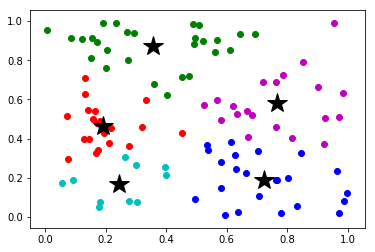

In [376]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
import random
from functools import reduce, partial
from operator import add

class KMeans:
    """good old class based solution"""
    def __init__(self, k):
        self.k = k
        self.means = [None for _ in range(k)]

    def fit(self, points, num_iters=10):
        assignments = [None for _ in points]
        self.means = random.sample(list(points), self.k)
        for _ in range(num_iters):
            for i, point in enumerate(points):
                assignments[i] = self.predict(point)
            for j in range(self.k):
                cluster = [p for p, c in zip(points, assignments) if c == j]
                self.means[j] = list(map(lambda x: x / len(cluster), reduce(partial(map, add), cluster)))

    def predict(self, point):
        d_min = float('inf')
        for j, m in enumerate(self.means):
            d = sum((m_i - p_i)**2 for m_i, p_i in zip(m, point))
            if d < d_min:
                prediction = j
                d_min = d
        return prediction

def run_kmeans(points, k=3):
    model = KMeans(k)
    model.fit(points, num_iters=100)
    assignments = [model.predict(point) for point in points]

    for x, y in model.means:
        plt.plot(x, y, marker='*', markersize=20, color='Black')

    for j, color in zip(range(k),
                      ['r', 'g', 'b', 'm', 'c']):
        cluster = [p
                   for p, c in zip(points, assignments)
                   if j == c]
        xs, ys = zip(*cluster)
        plt.scatter(xs, ys, color=color)

    plt.show()

#Generate some data
random.seed(42)
points = np.random.random((100,2))

run_kmeans(points, 5)

#  extend the KMeans  implementation above with KMean++

How does the execution of the original KMeans code change when using KMeans++? Discuss. HINT: number of iterations.


# [Optional Task] Plot cluster boundaries for first 10 iterations

Generate a plausible  artificial "mouse" dataset depicted below (with the ground truth). 



![image.png](attachment:image.png)

Using the homegrown Kmeans (KMeans++) plot the decision boundaries iteration by iteration for the first 10 iterations using 3 clusters. A plot like the following be sufficient.

![image.png](attachment:image.png)